In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
import seaborn as sns

# Data loading

In [101]:
train = pd.read_csv('training_data_v2.csv')
test = pd.read_csv('testing_data_v2.csv')
print(train.shape, test.shape)

(181266, 15) (77686, 15)


In [102]:
train.head(2)

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,844,apartment,900,2,1.0,1,1,1,0,0,0,laundry in bldg,off-street parking,44.0472,-92.4925
1,600,apartment,650,2,1.0,1,1,0,0,0,0,laundry on site,off-street parking,38.6012,-92.2879


# Generate Dummy variables

In [103]:
train_1 = pd.get_dummies(train, drop_first=True, dtype=int)
test_1 = pd.get_dummies(test, drop_first=True, dtype=int)


In [104]:
# sns.pairplot(train)

In [105]:
train_1.columns

Index(['price', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'lat', 'long', 'type_condo', 'type_cottage/cabin',
       'type_duplex', 'type_flat', 'type_house', 'type_in-law', 'type_loft',
       'type_manufactured', 'type_townhouse',
       'laundry_options_laundry on site', 'laundry_options_no laundry on site',
       'laundry_options_w/d hookups', 'laundry_options_w/d in unit',
       'parking_options_detached garage', 'parking_options_no parking',
       'parking_options_off-street parking', 'parking_options_street parking',
       'parking_options_valet parking'],
      dtype='object')

In [106]:
train_1.shape

(181266, 30)

# Random Forest Regressor

In [107]:
rf = RandomForestRegressor(n_estimators= 10)

In [108]:
train_X = train_1.drop('price', axis = 1)
train_y = train_1['price']
test_X = test_1.drop('price', axis = 1)
test_y = test_1['price']


In [109]:
rf.fit(train_X, train_y)

RandomForestRegressor(n_estimators=10)

In [32]:
train_pred = rf.predict(train_X)
train_r2 = r2_score(train_y, train_pred)
print("Training R-squre :", train_r2)

Training R-squre : 0.9726138336861616


In [34]:
test_pred = rf.predict(test_X)
test_r2 = r2_score(test_y, test_pred)
print("Test R-squre :", test_r2)

Test R-squre : 0.8695492151158168


In [36]:
# Adjusted R-Square

train_adj_r2 = 1-(1-train_r2)*(train_X.shape[0]-1)/(train_X.shape[0]-train_X.shape[1])
test_adj_r2 = 1-(1-test_r2)*(test_X.shape[0]-1)/(test_X.shape[0]-test_X.shape[1])

print("Training Adjusted R-squre :", train_adj_r2)
print("Test Adjusted R-squre :", test_adj_r2)


Training Adjusted R-squre : 0.972609602692177
Test Adjusted R-squre : 0.8695021797941233


Text(0.5, 1.0, 'Feature Importance - Random Forest Model')

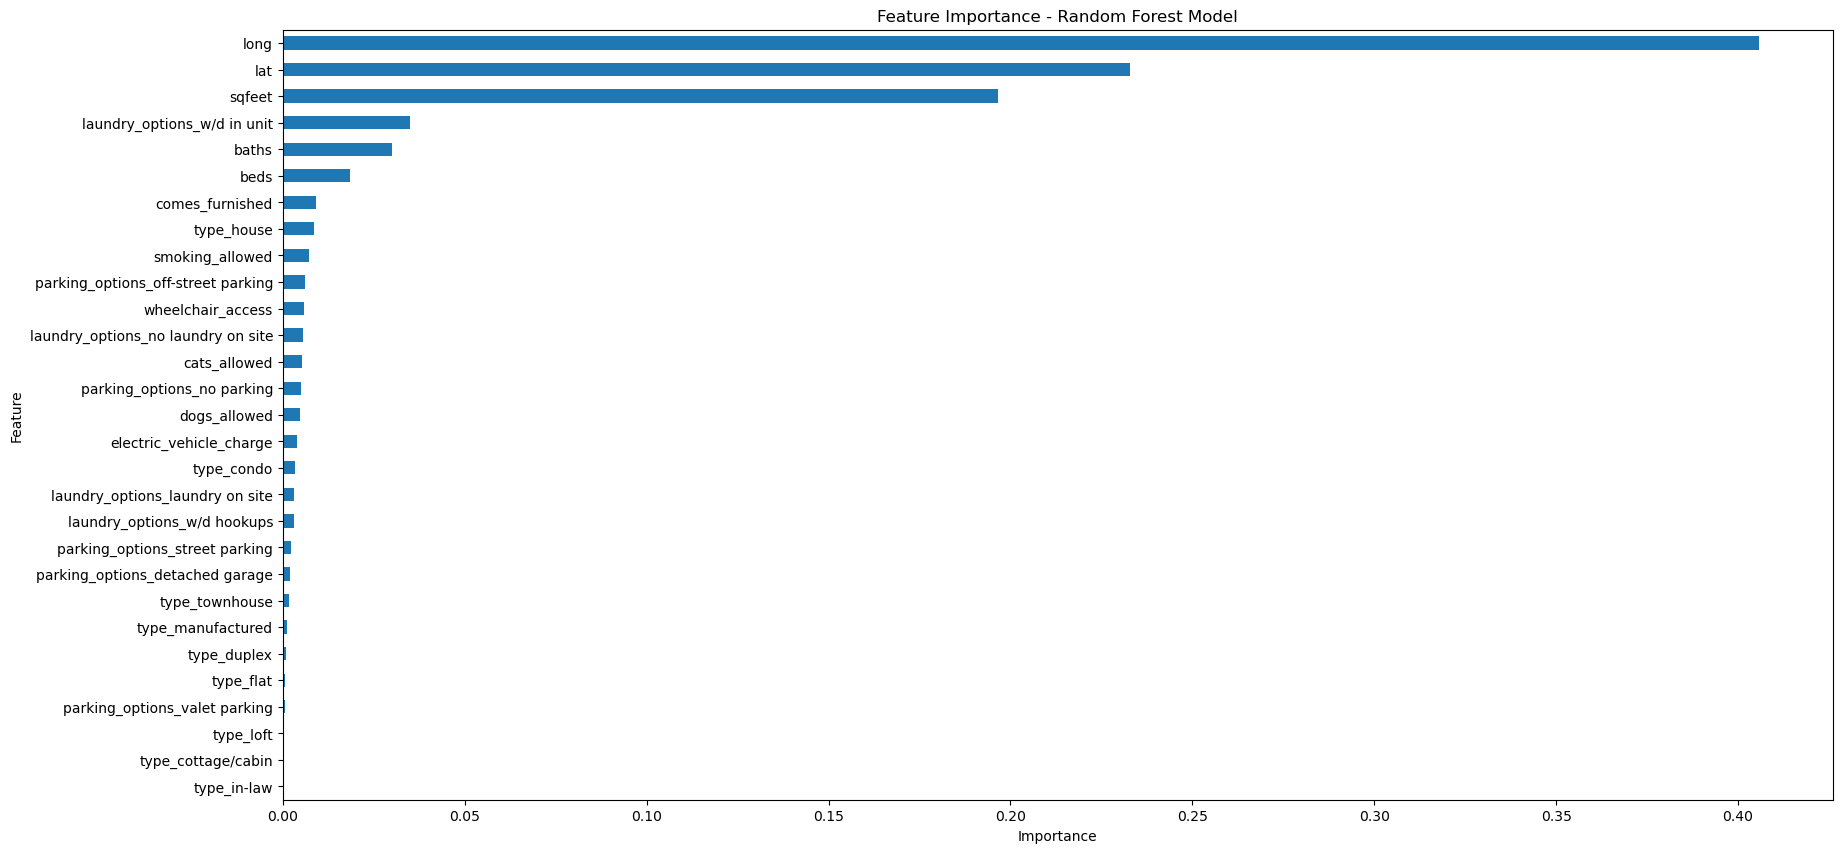

In [37]:
feat_imp = pd.Series(rf.feature_importances_, index=train_X.columns)
feat_imp.sort_values(ascending=True, inplace=True)
feat_imp.plot.barh( figsize = (20,10))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Model")

## Random Forest Scaled

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_X)
test_scaled = scaler.transform(test_X)

In [41]:
rf_scaled = RandomForestRegressor(n_estimators= 10)
rf_scaled.fit(train_scaled, train_y)

train_pred = rf_scaled.predict(train_scaled)
train_r2 = r2_score(train_y, train_pred)
print("Training R-squre :", train_r2)

test_pred = rf_scaled.predict(test_scaled)
test_r2 = r2_score(test_y, test_pred)
print("Test R-squre :", test_r2)

# Adjusted R-Square

train_adj_r2 = 1-(1-train_r2)*(train_scaled.shape[0]-1)/(train_scaled.shape[0]-train_scaled.shape[1])
test_adj_r2 = 1-(1-test_r2)*(test_scaled.shape[0]-1)/(test_scaled.shape[0]-test_scaled.shape[1])

print("Training Adjusted R-squre :", train_adj_r2)
print("Test Adjusted R-squre :", test_adj_r2)


Training R-squre : 0.972270242166049
Test R-squre : 0.8679047613369164
Training Adjusted R-squre : 0.9722659580892912
Test Adjusted R-squre : 0.867857133091136


Text(0.5, 1.0, 'Feature Importance - Random Forest Model')

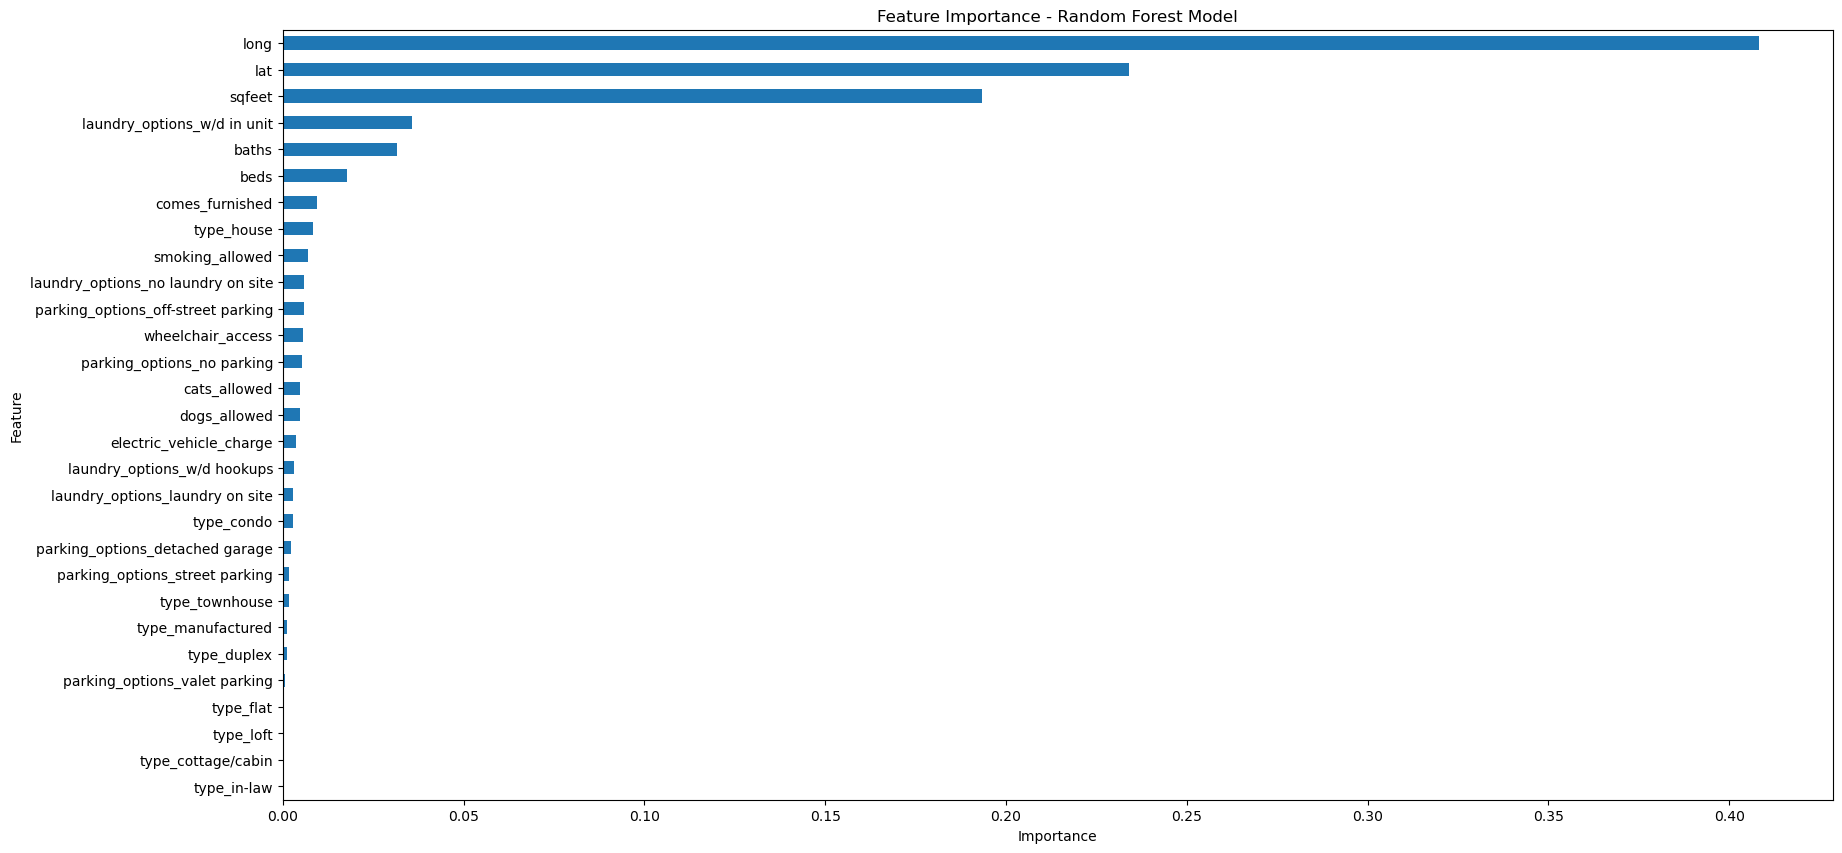

In [43]:
feat_imp = pd.Series(rf_scaled.feature_importances_, index=train_X.columns)
feat_imp.sort_values(ascending=True, inplace=True)
feat_imp.plot.barh( figsize = (20,10))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Model")

## Hyperparameter Tuning

In [117]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [10, 100, 150]}

In [118]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(rf, random_grid, n_iter=500, scoring='r2', n_jobs=-1, cv=3)
model_random = rf_random.fit(train_X, train_y)

# random random search results
print('Best random search hyperparameters are: '+str(model_random.best_params_))
print('Best random search score is: '+str(model_random.best_score_))

C:\Users\PreetiSingla\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 324 is smaller than n_iter=500. Running 324 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\PreetiSingla\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best random search hyperparameters are: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
Best random search score is: 0.8624015745639116


In [123]:
best_params = {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 
                'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
rf_best = RandomForestRegressor(n_estimators=150, min_samples_split=2, 
                                min_samples_leaf=1, max_features='auto', max_depth=30, bootstrap=True)
rf_best.fit(train_X, train_y)



C:\Users\PreetiSingla\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=30, max_features='auto', n_estimators=150)

In [124]:
train_pred = rf_best.predict(train_X)
train_r2 = r2_score(train_y, train_pred)
print("Training R-squre :", train_r2)

# cols = list(train_X.columns)

# for col in cols:
#     if col not in list(test_X):
#         test_X[col] = 0
# test_X = test_X[cols]
test_pred = rf_best.predict(test_X)
test_r2 = r2_score(test_y, test_pred)
print("Test R-squre :", test_r2)

# Adjusted R-Square

train_adj_r2 = 1-(1-train_r2)*(train_X.shape[0]-1)/(train_X.shape[0]-train_X.shape[1])
test_adj_r2 = 1-(1-test_r2)*(test_X.shape[0]-1)/(test_X.shape[0]-test_X.shape[1])

print("Training Adjusted R-squre :", train_adj_r2)
print("Test Adjusted R-squre :", test_adj_r2)

Training R-squre : 0.9792233097339968
Test R-squre : 0.881404961551532
Training Adjusted R-squre : 0.9792200998633444
Test Adjusted R-squre : 0.8813622009365643


## RF model Region wise

In [52]:
df_region = pd.read_csv('housing_cleaned_US_region.csv')
df_region.shape

(258952, 18)

In [54]:
train_1.shape, test_1.shape

((181266, 30), (77686, 30))

In [57]:
df_region.columns

Index(['city', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state', 'US_region'],
      dtype='object')

In [59]:
train.columns

Index(['price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long'],
      dtype='object')

In [60]:
[col for col in df_region.columns if col not in train.columns]

['city', 'state', 'US_region']

In [68]:
train_region = pd.merge(train, df_region[['state', 'US_region']], how = 'left', left_index = True, right_index = True)
print(train_region.shape, train.shape)
test_region = pd.merge(test, df_region[['state', 'US_region']], how = 'left', left_index = True, right_index = True)
print(test_region.shape, test.shape)

(181266, 17) (181266, 15)
(77686, 17) (77686, 15)


In [69]:
df_region['US_region'].unique()

array(['South', 'West', 'Northeast', 'Midwest'], dtype=object)

In [70]:
train_south = train_region[train_region['US_region'] == 'South']
train_west = train_region[train_region['US_region'] == 'West']
train_northest = train_region[train_region['US_region'] == 'Northeast']
train_midwest = train_region[train_region['US_region'] == 'Midwest']


test_south = test_region[test_region['US_region'] == 'South']
test_west = test_region[test_region['US_region'] == 'West']
test_northest = test_region[test_region['US_region'] == 'Northeast']
test_midwest = test_region[test_region['US_region'] == 'Midwest']

In [92]:
def randomforest_region(train, test): 
    train = train.drop(['state', 'US_region'], axis = 1)
    test = test.drop(['state', 'US_region'], axis = 1)
    print(train.shape, test.shape)
    train_1 = pd.get_dummies(train, drop_first=True, dtype=int)
    test_1 = pd.get_dummies(test, drop_first=True, dtype=int)

    train_X = train_1.drop('price', axis = 1)
    train_y = train_1['price']
    test_X = test_1.drop('price', axis = 1)
    test_y = test_1['price']
    
    rf = RandomForestRegressor(n_estimators= 10)
    rf.fit(train_X, train_y)
    
    train_pred = rf.predict(train_X)
    train_r2 = r2_score(train_y, train_pred)
    print("Training R-squre :", train_r2)

    cols = list(train_X.columns)

    for col in cols:
        if col not in list(test_X):
            test_X[col] = 0
    test_X = test_X[cols]
    test_pred = rf.predict(test_X)
    test_r2 = r2_score(test_y, test_pred)
    print("Test R-squre :", test_r2)
    
    # Adjusted R-Square
    
    train_adj_r2 = 1-(1-train_r2)*(train_X.shape[0]-1)/(train_X.shape[0]-train_X.shape[1])
    test_adj_r2 = 1-(1-test_r2)*(test_X.shape[0]-1)/(test_X.shape[0]-test_X.shape[1])
    
    print("Training Adjusted R-squre :", train_adj_r2)
    print("Test Adjusted R-squre :", test_adj_r2)

    return rf, train_X, test_X

In [82]:
len(rf_south.feature_importances_)

29

(78377, 15) (21938, 15)
Training R-squre : 0.9671307208946466
Test R-squre : 0.7881405719077709
Training Adjusted R-squre : 0.9671189740751368
Test Adjusted R-squre : 0.7878698126770172


Text(0.5, 1.0, 'Feature Importance - Random Forest Model')

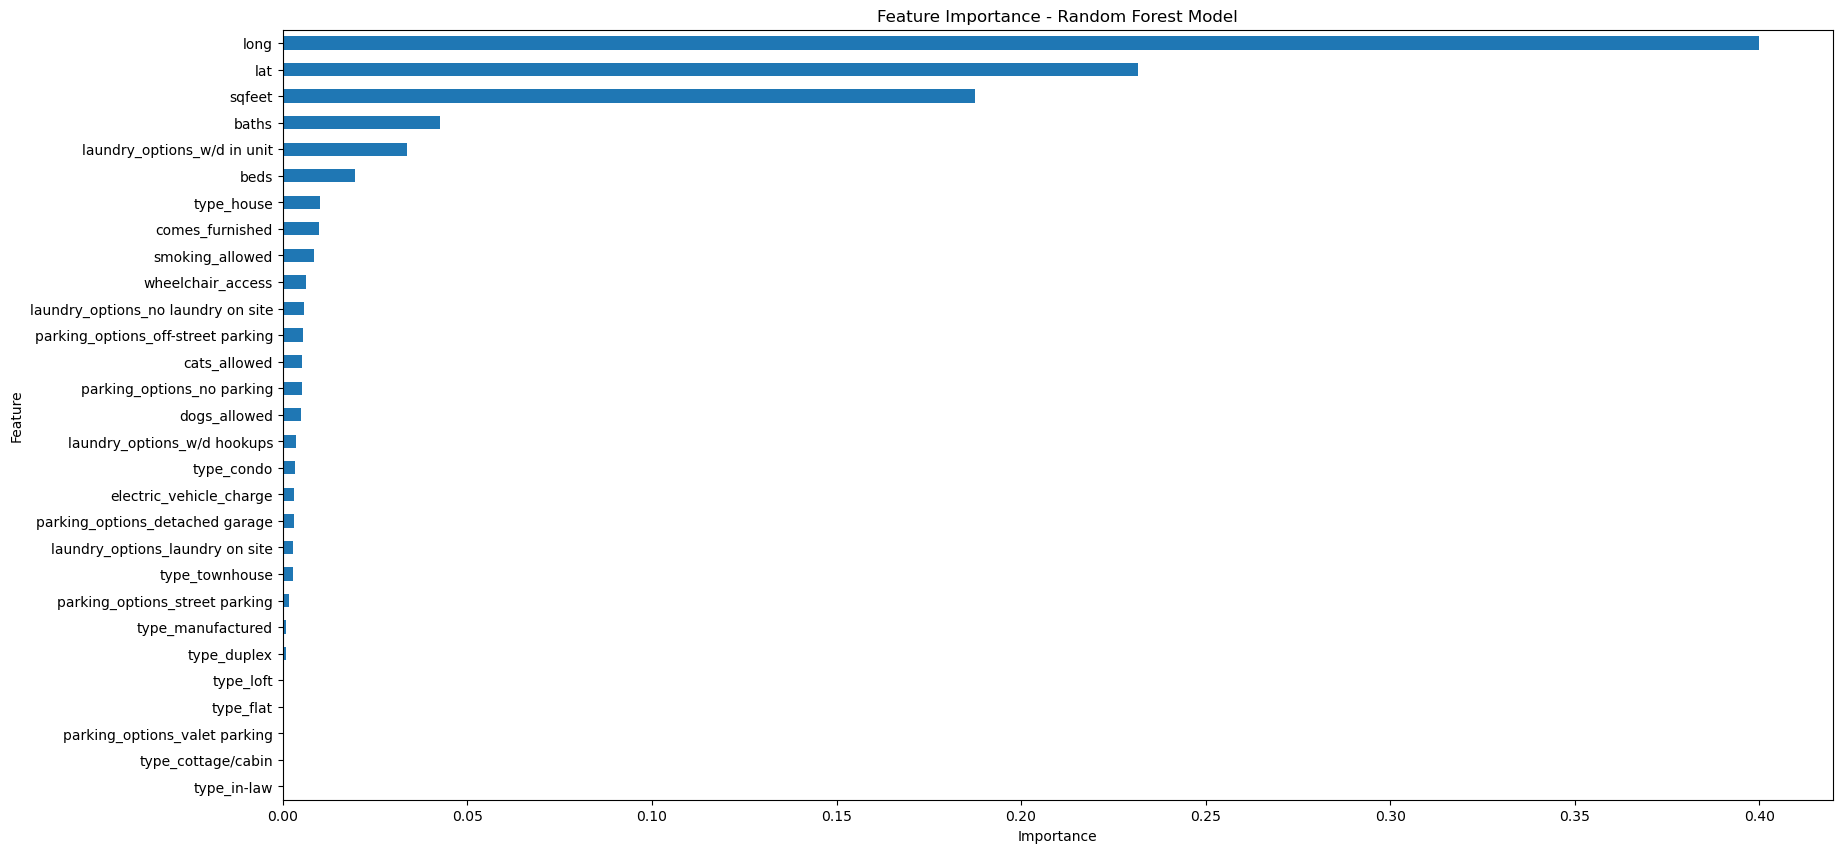

In [93]:

rf_south,train_X, test_X = randomforest_region(train_south, test_south)
feat_imp = pd.Series(rf_south.feature_importances_, index=train_X.columns)
feat_imp.sort_values(ascending=True, inplace=True)
feat_imp.plot.barh( figsize = (20,10))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Model")

(58209, 15) (52117, 15)
Training R-squre : 0.9654151560314428
Test R-squre : 0.8337170255812791
Training Adjusted R-squre : 0.965398511555143
Test Adjusted R-squre : 0.833627639863192


Text(0.5, 1.0, 'Feature Importance - Random Forest Model')

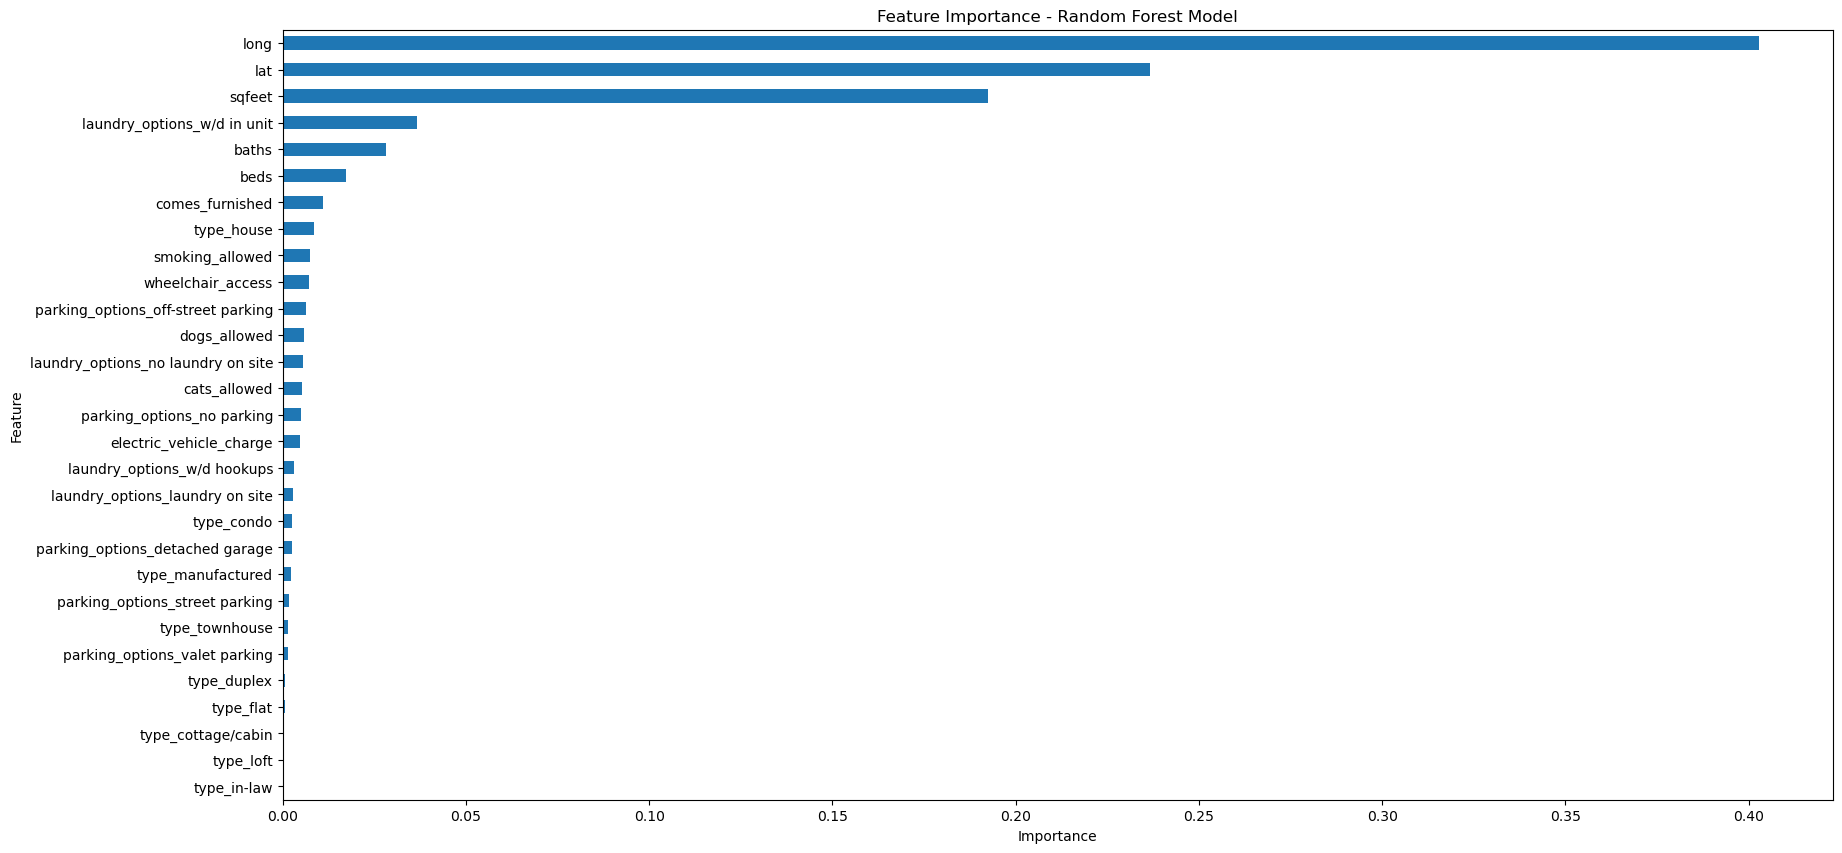

In [94]:

rf_west,train_X, test_X = randomforest_region(train_west, test_west)
feat_imp = pd.Series(rf_west.feature_importances_, index=train_X.columns)
feat_imp.sort_values(ascending=True, inplace=True)
feat_imp.plot.barh( figsize = (20,10))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Model")

(8757, 15) (3631, 15)
Training R-squre : 0.9391250827999026
Test R-squre : 0.45967382766323306
Training Adjusted R-squre : 0.9389297920481149
Test Adjusted R-squre : 0.45547362421364135


Text(0.5, 1.0, 'Feature Importance - Random Forest Model')

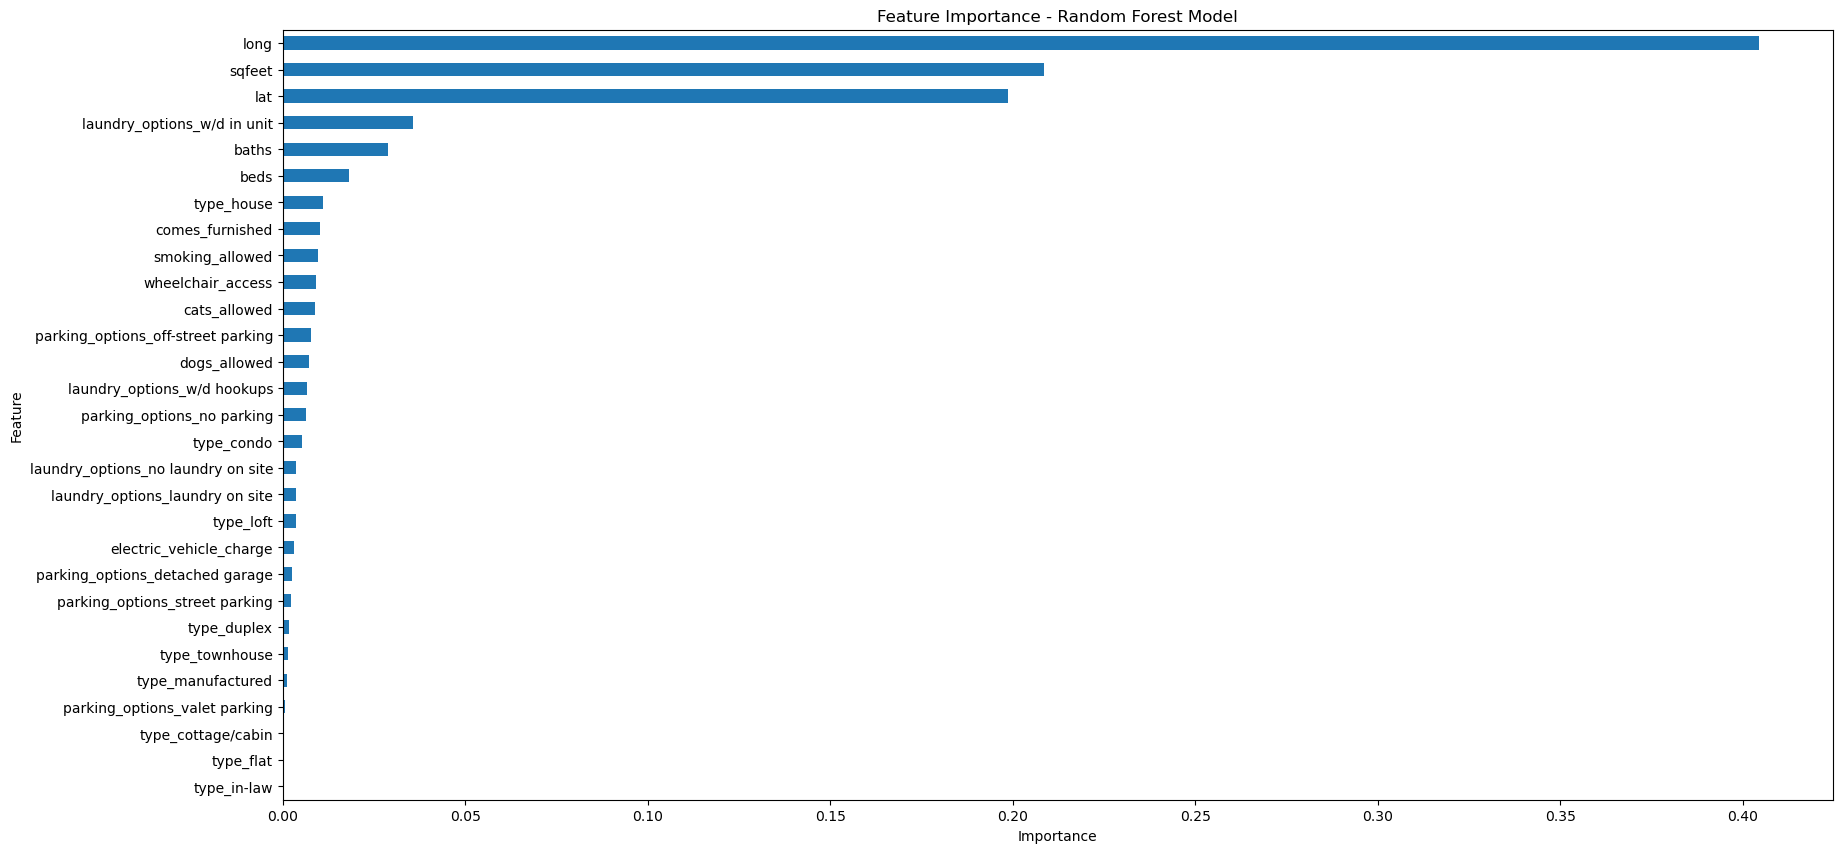

In [95]:

rf_northest,train_X, test_X = randomforest_region(train_northest, test_northest)
feat_imp = pd.Series(rf_northest.feature_importances_, index=train_X.columns)
feat_imp.sort_values(ascending=True, inplace=True)
feat_imp.plot.barh( figsize = (20,10))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Model")

In [127]:
train_midw, test_midw = train_test_split(train_midwest, test_size=0.3, random_state= 42)
print(train_midw.shape, test_midw.shape)


(25146, 17) (10777, 17)


(25146, 15) (10777, 15)
Training R-squre : 0.9560656320473873
Test R-squre : 0.7853459445904802
Training Adjusted R-squre : 0.9560166547689435
Test Adjusted R-squre : 0.7847867416176977


Text(0.5, 1.0, 'Feature Importance - Random Forest Model')

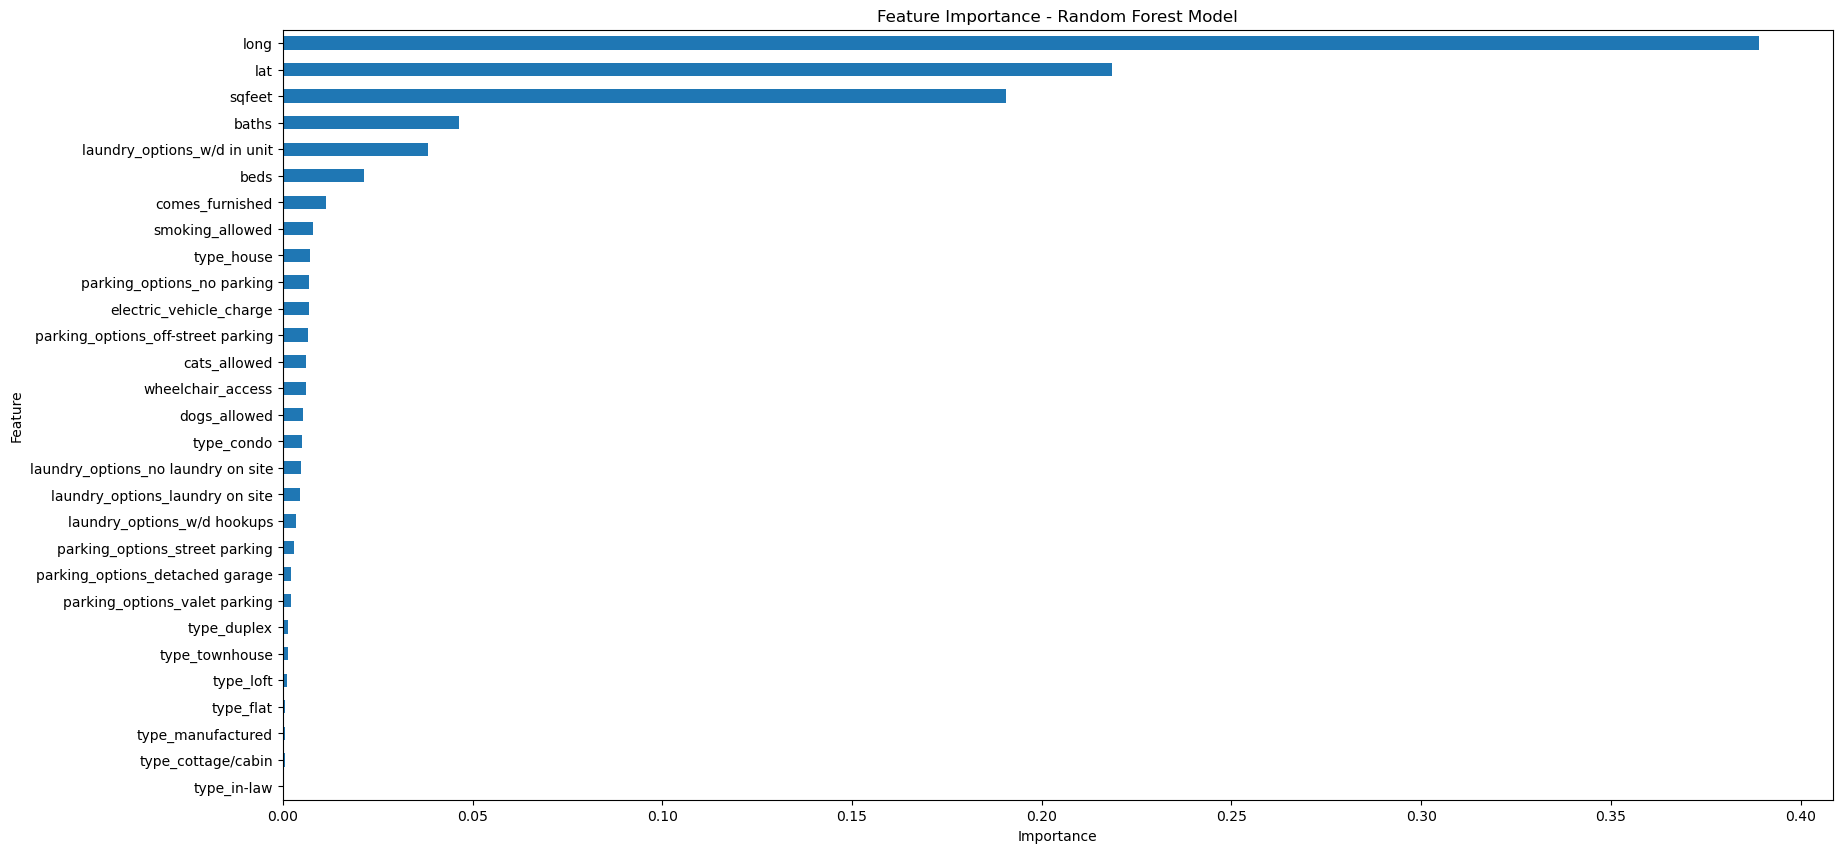

In [128]:
rf_midwest,train_X, test_X = randomforest_region(train_midw, test_midw)
feat_imp = pd.Series(rf_midwest.feature_importances_, index=train_X.columns)
feat_imp.sort_values(ascending=True, inplace=True)
feat_imp.plot.barh( figsize = (20,10))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Model")

# XGBoost Regressor

In [97]:
import xgboost
print(xgboost.__version__)

2.0.3


In [110]:
train_X = train_1.drop('price', axis = 1)
train_y = train_1['price']
test_X = test_1.drop('price', axis = 1)
test_y = test_1['price']

In [111]:
# create an xgboost regression model
xgb = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [112]:
xgb.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [113]:
train_pred = xgb.predict(train_X)
train_r2 = r2_score(train_y, train_pred)
print("Training R-squre :", train_r2)

Training R-squre : 0.9429928303890249


In [114]:
test_pred = xgb.predict(test_X)
test_r2 = r2_score(test_y, test_pred)
print("Test R-squre :", test_r2)

Test R-squre : 0.8655127205047619


In [115]:
# Adjusted R-Square

train_adj_r2 = 1-(1-train_r2)*(train_X.shape[0]-1)/(train_X.shape[0]-train_X.shape[1])
test_adj_r2 = 1-(1-test_r2)*(test_X.shape[0]-1)/(test_X.shape[0]-test_X.shape[1])

print("Training Adjusted R-squre :", train_adj_r2)
print("Test Adjusted R-squre :", test_adj_r2)


Training Adjusted R-squre : 0.9429840231325094
Test Adjusted R-squre : 0.865464229784983


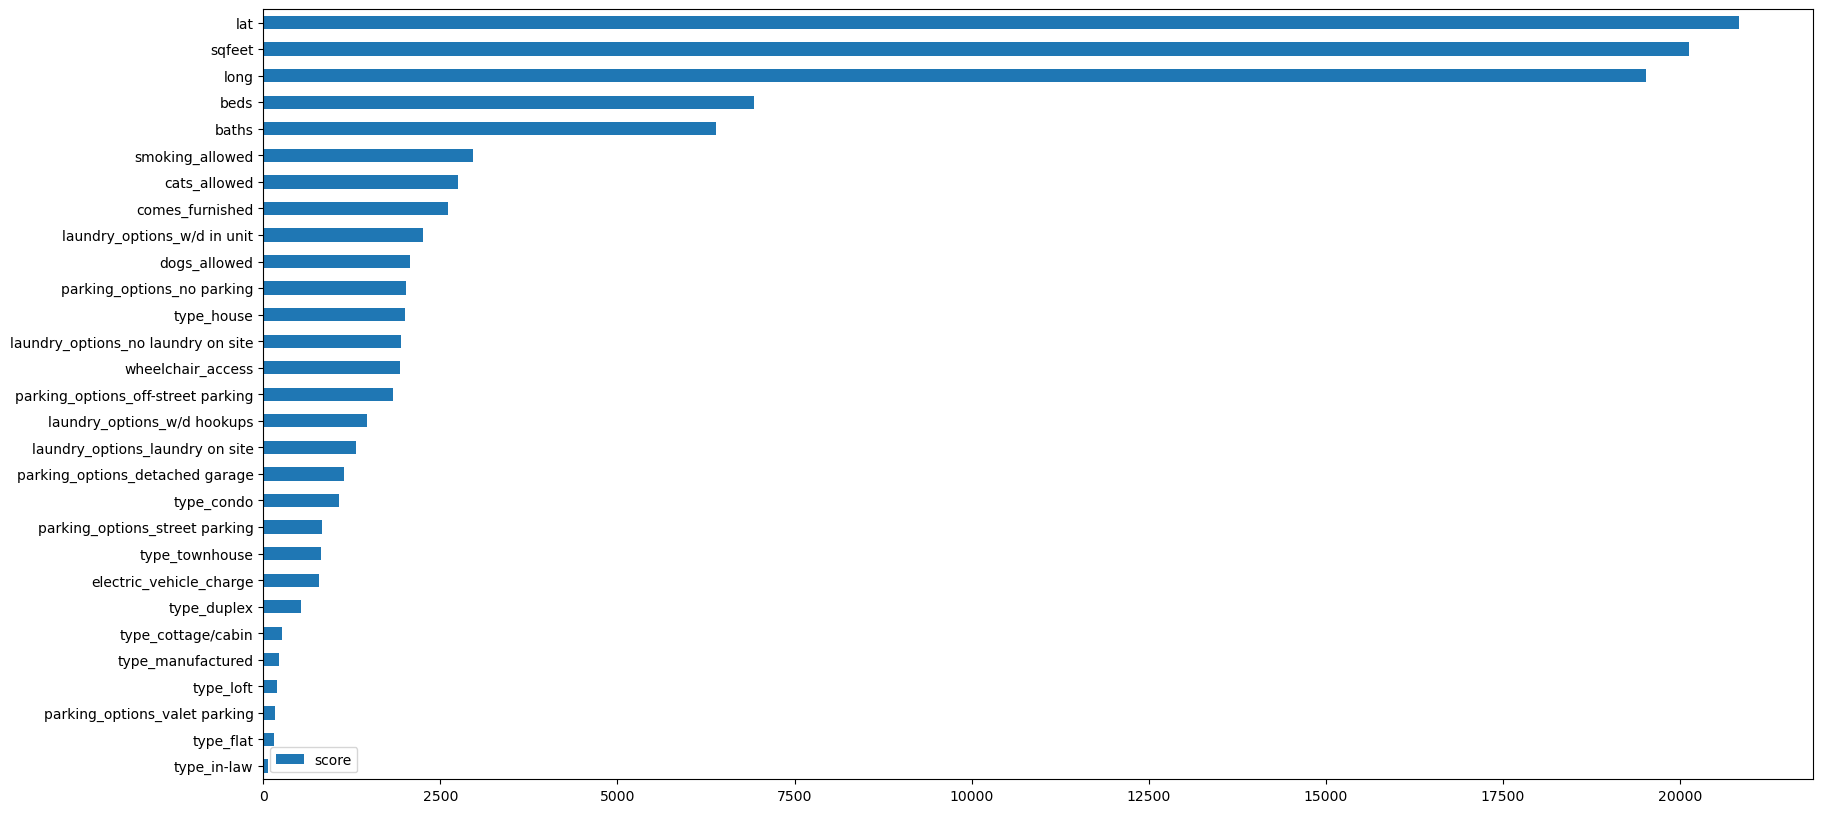

In [116]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data = data.sort_values('score', ascending = False)
ax = data.plot(kind='barh', figsize = (20,10))
ax.invert_yaxis()